# Convolutional Neural Netweork - Image classification


## Import Libraries

In [62]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [64]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Load data

In [65]:
dataset_url=  "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [66]:
data_dir

'.\\datasets\\flower_photos'

###  pathlib makes the directorties available as Windows directories

In [67]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [68]:
data_dir

WindowsPath('datasets/flower_photos')

In [69]:
list(data_dir.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [70]:
roses  = list(data_dir.glob('roses/*'))

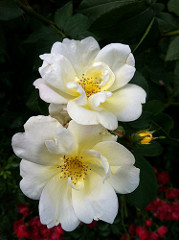

In [71]:
PIL.Image.open(str(roses[0]))

In [72]:
daisies = list(data_dir.glob('daisy/*'))

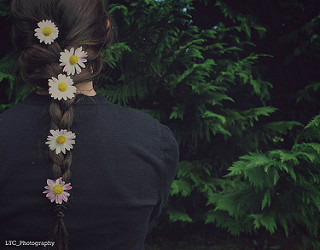

In [73]:
PIL.Image.open(daisies[4])

In [74]:
pwd

'C:\\Users\\swati'

In [75]:
flower_catgories = list(data_dir.glob('/*'))

NotImplementedError: Non-relative patterns are unsupported

In [ ]:
flower_catgories

In [ ]:
flower_path_dict = {
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'roses': list(data_dir.glob('roses/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    
}

In [ ]:
flower_labels_dict = {
    'daisy': 1,
    'dandelion': 2,
    'roses': 3,
    'sunflowers': 4,
    'tulips': 5
    
}

In [ ]:
img = cv2.imread(str(flower_path_dict['roses'][0]))

In [ ]:
img

In [ ]:
img.shape

### the image dimentions are not same here. So we need to resize the images.

In [ ]:
cv2.resize(img,(180,180,)).shape

## Generate X and y

In [ ]:
for flower,paths in flower_path_dict.items():
    print(f'{flower}:{len(paths)}')

In [ ]:
flower_labels_dict['roses']

In [ ]:
X = []
y = []
for flower,paths in flower_path_dict.items():
    for path in paths:
        img = cv2.imread(str(path))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flower_labels_dict[flower])


In [ ]:
X[0]

In [ ]:
y[0]

In [ ]:
X = np.array(X)

In [ ]:
y = np.array(y)

In [ ]:
X[0]

In [81]:
X.shape

(3670, 180, 180, 3)

### Split X and y into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 4)

### Scale the X values by dividing by 255, as thats the max pixel value to bring X values in range 0 to 1

In [ ]:
X_train = X_train/255
x_test = X_test/255

In [ ]:
X_train[0]

## Build Model

In [98]:
model = keras.Sequential([
                  keras.layers.Conv2D(16 ,3, strides = (1,1), padding = 'valid'),
                  keras.layers.MaxPool2D(),
                  keras.layers.Conv2D(32,3,strides=(1,1),padding = 'valid'),
                  keras.layers.MaxPool2D(),
                  keras.layers.Flatten(),
                  keras.layers.Dense(120, activation = 'relu'),
                  keras.layers.Dense(5)


])

In [99]:
model.compile(optimizer = 'adam',loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = 'accuracy')

In [100]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
81/81 [==============================] - 31s 371ms/step - loss: 0.0527 - accuracy: 0.0000e+00
Epoch 2/10
81/81 [==============================] - 29s 358ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 3/10
81/81 [==============================] - 29s 361ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 4/10
81/81 [==============================] - 29s 361ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 5/10
81/81 [==============================] - 30s 365ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 6/10
81/81 [==============================] - 29s 363ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 7/10
81/81 [==============================] - 29s 360ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 8/10
81/81 [==============================] - 29s 360ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 9/10
81/81 [==============================] - 30s 365ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Epoch 10/10
81/81 [====

In [101]:
loss, accuracy = model.evaluate(X_test,y_test)

35/35 [==============================] - 7s 121ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


### This is an overfitting scenario as the accuracy is high with training data set but low with test data. This can be fixed with data augmentation i.e. creating samples from existing samples by doing actions like rotation, zoom in/out, contrast etc.

In [102]:
accuracy

0.0

In [104]:
augmentation = keras.Sequential([
                       keras.layers.RandomFlip("horizontal", input_shape=(180, 180,3)),
                        keras.layers.RandomRotation(0.3),
                        keras.layers.RandomZoom(0.6)
                        ])

### Add the augmentation layer in the begining of all other layers and retrain model 

In [ ]:
num_classes = 5

model = Sequential([
  augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=30)  

Epoch 1/30
81/81 [==============================] - 53s 623ms/step - loss: 0.0676 - accuracy: 0.0000e+00
Epoch 2/30
 7/81 [=>............................] - ETA: 45s - loss: 0.0000e+00 - accuracy: 0.0000e+00

In [ ]:
model.evaluate(X_test,y_test)
